In [1]:
## Import Pacakages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
## Import dataset
city_data = pd.read_csv(r'C:\Users\USER\desktop\City_bikes.csv')

In [3]:
city_data.head()

,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Age,Age Groups,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,3194,3271,24668,Subscriber,1961,60,55-64,25,1,Winter,10,Sunday
1,3183,3203,26167,Subscriber,1993,28,25-34,11,1,Winter,10,Sunday
2,3183,3203,26167,Subscriber,1993,28,25-34,11,1,Winter,10,Sunday
3,3186,3270,24604,Subscriber,1970,51,45-54,4,1,Winter,10,Sunday
4,3270,3206,24641,Subscriber,1978,43,35-44,11,1,Winter,10,Sunday


In [4]:
city_data.shape

(20400, 12)

In [5]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Station ID      20400 non-null  int64 
 1   End Station ID        20400 non-null  int64 
 2   Bike ID               20400 non-null  int64 
 3   User Type             20400 non-null  object
 4   Birth Year            20400 non-null  int64 
 5   Age                   20400 non-null  int64 
 6   Age Groups            20400 non-null  object
 7   Trip_Duration_in_min  20400 non-null  int64 
 8   Month                 20400 non-null  int64 
 9   Season                20400 non-null  object
 10  Temperature           20400 non-null  int64 
 11  Weekday               20400 non-null  object
dtypes: int64(8), object(4)
memory usage: 1.9+ MB


In [6]:
 city_data.describe()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip_Duration_in_min,Month,Temperature
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,3215.863627,3211.439510,25301.732647,1979.319706,41.680294,9.398775,2.221569,14.897647
std,34.563120,82.707121,989.974295,10.091335,10.091335,66.858684,0.822335,2.398100
min,3183.000000,152.000000,15084.000000,1931.000000,22.000000,1.000000,1.000000,9.000000
25%,3186.000000,3186.000000,24523.000000,1974.000000,35.000000,4.000000,1.000000,13.000000
50%,3203.000000,3202.000000,24679.000000,1982.000000,39.000000,5.000000,2.000000,15.000000
75%,3267.000000,3220.000000,26220.000000,1986.000000,47.000000,9.000000,3.000000,17.000000
max,3281.000000,3442.000000,29296.000000,1999.000000,90.000000,6515.000000,3.000000,19.000000


In [7]:
city_data.isnull().sum()

Start Station ID        0
End Station ID          0
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

In [8]:
customer_type = city_data['User Type'].value_counts()
print(customer_type)

Subscriber       20020
One-time user      380
Name: User Type, dtype: int64


In [9]:
user_day = city_data['Weekday'].value_counts()
print(user_day)

Wednesday    4002
Thursday     3635
Monday       3051
Friday       2958
Tuesday      2937
Sunday       1915
Saturday     1902
Name: Weekday, dtype: int64


In [16]:
count_of_days = city_data.groupby('User Type')['Weekday'].value_counts()
print(count_of_days)

User Type      Weekday  
One-time user  Saturday      109
               Sunday         73
               Monday         60
               Wednesday      45
               Friday         37
               Tuesday        32
               Thursday       24
Subscriber     Wednesday    3957
               Thursday     3611
               Monday       2991
               Friday       2921
               Tuesday      2905
               Sunday       1842
               Saturday     1793
Name: Weekday, dtype: int64


In [17]:
pivot= city_data.pivot_table(values='Trip_Duration_in_min', index='Weekday', columns='User Type' )
print(pivot)

User Type  One-time user  Subscriber
Weekday                             
Friday        207.378378    9.696337
Monday         45.600000    9.081912
Saturday       68.733945    9.636364
Sunday         28.561644    9.633008
Thursday       15.083333    7.425921
Tuesday        35.812500    7.024441
Wednesday      70.577778    7.413445


In [18]:
pivot= city_data.pivot_table(values='Trip_Duration_in_min', index='Age Groups', columns='User Type' )
print(pivot)

User Type   One-time user  Subscriber
Age Groups                           
18-24                 NaN   11.883333
25-34            84.50000    8.837049
35-44            64.81746    7.695343
45-54                 NaN    8.000838
55-64                 NaN   10.054317
65-74                 NaN    7.234211
75+                   NaN   41.283582


In [10]:
avg_ride_per_group =  city_data.groupby('Age Groups')['Trip_Duration_in_min'].mean()
print(avg_ride_per_group)

Age Groups
18-24    11.883333
25-34     8.867707
35-44    10.030388
45-54     8.000838
55-64    10.054317
65-74     7.234211
75+      41.283582
Name: Trip_Duration_in_min, dtype: float64


In [11]:
ride_per_age_group = city_data.groupby('Age Groups')['Trip_Duration_in_min'].agg([min, max, sum])
print(ride_per_age_group)

            min   max    sum
Age Groups                  
18-24         3    38    713
25-34         1  3693  43771
35-44         1  6515  92751
45-54         1  1507  28651
55-64         1  1491  17585
65-74         1   209   5498
75+           1  2422   2766


In [12]:
ride_per_user_group = city_data.groupby(['Age Groups', 'User Type'])['Trip_Duration_in_min'].agg([min, max, sum])
print(ride_per_user_group)

                          min   max    sum
Age Groups User Type                      
18-24      Subscriber       3    38    713
25-34      One-time user   44   125    169
           Subscriber       1  3693  43602
35-44      One-time user    1  6515  24501
           Subscriber       1  2422  68250
45-54      Subscriber       1  1507  28651
55-64      Subscriber       1  1491  17585
65-74      Subscriber       1   209   5498
75+        Subscriber       1  2422   2766


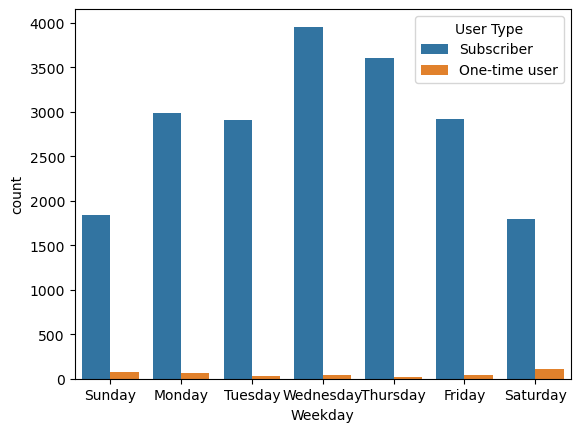

In [13]:
sns.countplot(x='Weekday', data=city_data, hue='User Type')
plt.show()

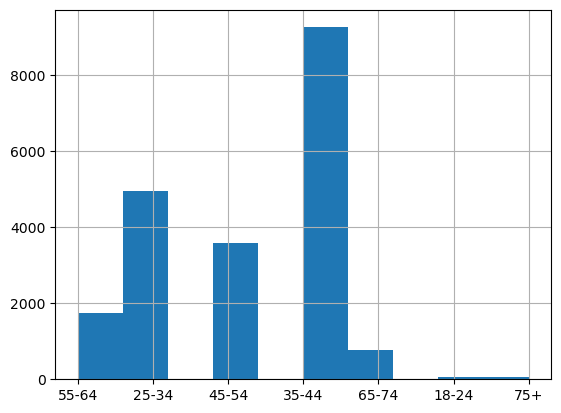

In [14]:
city_data['Age Groups'].hist()
plt.show()

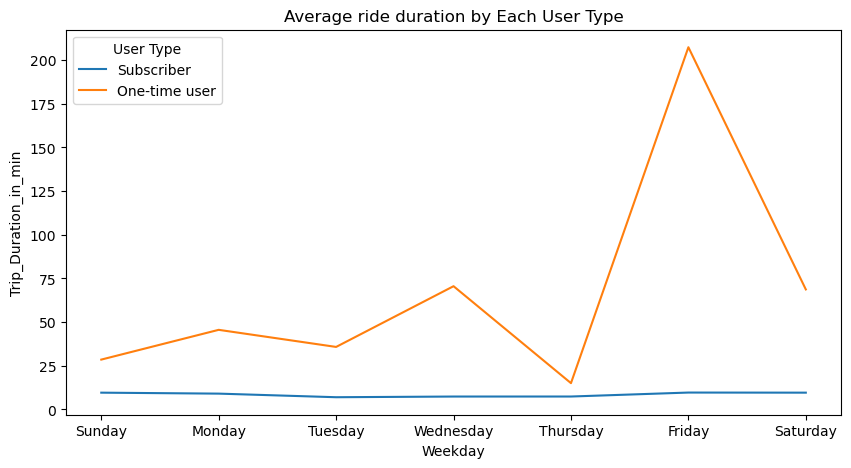

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Weekday', y='Trip_Duration_in_min', data=city_data, hue='User Type', ci=None)
plt.title('Average ride duration by Each User Type')
plt.show()

Text(0.5, 1.05, 'Performance by Age group')

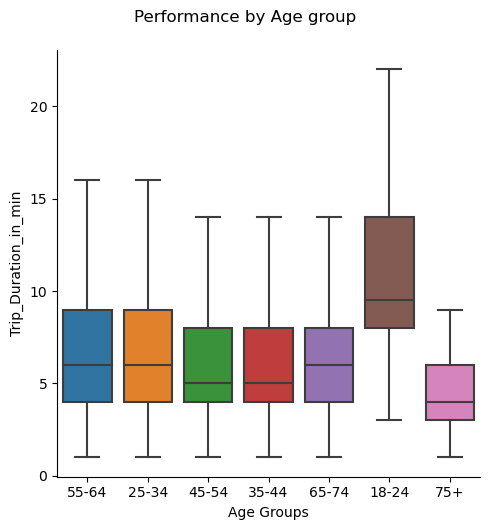

In [21]:
g = sns.catplot(x='Age Groups', y='Trip_Duration_in_min', data=city_data, kind='box', showfliers=False)
g.fig.suptitle('Performance by Age group', y=1.05)

<AxesSubplot:xlabel='Trip_Duration_in_min', ylabel='Season'>

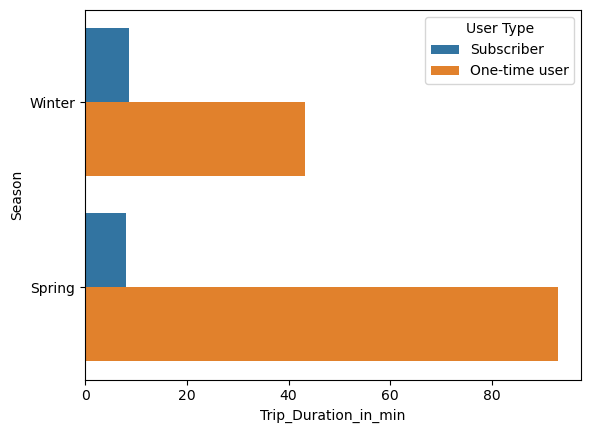

In [24]:
sns.barplot(x='Trip_Duration_in_min', y='Season', data=city_data, hue='User Type', ci=None)